# One-Hot-Encoding

## 원리

* 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 치환

## get_dummies

### 사용 데이터

* 데이터 로드

In [1]:
from ml1.preamble import*
import os

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, names=
                  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status',
                   'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
                   'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


* 데이터에 null 이 있는지 확인

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


* 범주값이 이상 없는지 확인

In [3]:
for col in data:
    if data[col].dtype == object:
        print(col, data[col].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
gender [' Male' ' Female']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
income [' <=50K' ' >50K']


### 원핫 인코딩

In [4]:
print('원본 특성:\n', list(data.columns),'\n')
data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성:\n', list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


* Numpy로 변환

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.to_numpy()
y = data['income'].to_numpy()
print(X.shape, y.shape)

(32561, 44) (32561,)


### 인코딩된 데이터로 학습

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(f'점수 : {logreg.score(X_test, y_test):.2f}')

점수 : 0.81


### 숫자로 표현된 범주형 특성일 경우

In [8]:
df = pd.DataFrame({'숫자 특성': [0, 1, 2, 3],
                   '범주형 특성': ['A', 'B', 'C', 'A']})
display(df)

,숫자 특성,범주형 특성
0,0,A
1,1,B
2,2,C
3,3,A


* 기본적으로 숫자 특성은 연속형이라 간주되어 인코딩되지 않음

In [9]:
display(pd.get_dummies(df))

,숫자 특성,범주형 특성_A,범주형 특성_B,범주형 특성_C
0,0,1,0,0
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0


* 따라서 columns 를 명시해주거나

In [10]:
display(pd.get_dummies(df,columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,숫자 특성_3,범주형 특성_A,범주형 특성_B,범주형 특성_C
0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0


* 숫자 특성 column의 dtype을 바꾸면 됨

In [11]:
df['숫자 특성'] = df['숫자 특성'].astype('category')   # str도 가능
display(pd.get_dummies(df))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,숫자 특성_3,범주형 특성_A,범주형 특성_B,범주형 특성_C
0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0


## OneHotEncoder/ ColumnTransformer

* get_dummies는 train_set과 test_set를 동시에 인코딩해야하지만, OneHotEncoder는 따로 가능

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False).fit(df)    # sparse 행렬이 아닌 numpy 행렬로 변환
print(ohe.get_feature_names())
print(ohe.transform(df))

['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x1_A' 'x1_B' 'x1_C']
[[1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0.]]


* OneHotEnconder는 전부 범주형으로 가정하기 때문에 ColumnTransformer가 필요
    * 'age','hours-per-week' 는 StandardScaler
    * 나머지 특성은 OneHotEncoder를 적용

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct = ColumnTransformer(
    [('scaling', StandardScaler(), ['age', 'hours-per-week']),
     ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

ct.fit(X_train)

print(ct.named_transformers_)

{'scaling': StandardScaler(), 'onehot': OneHotEncoder(sparse=False)}


In [14]:
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print(f'테스트 점수: {logreg.score(X_test_trans, y_test):.2f}')

테스트 점수: 0.81


## make_column_transformer

* ColumnTransformer은 이름을 일일히 지정해줘야하지만 make_column_transformer은 클래스 이름을 자동으로 이름으로 지정

In [15]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))
ct.fit(X_train)
ct.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder': OneHotEncoder(sparse=False)}

# Bining

## 원본

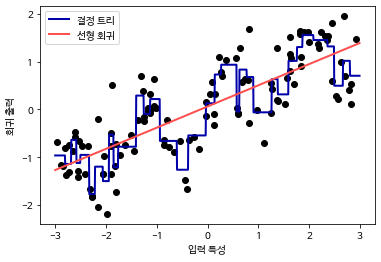

In [16]:
from ml1.preamble import*
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

plt.plot(X[:,0], y, 'o', c='k')

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label='결정 트리')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='선형 회귀')

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

## KBinsDiscretizer

### 분할기 생성

* 희소 배열로 변환

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges:', kb.bin_edges_)

bin edges: [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
        1.744,  2.333,  2.921])]


In [18]:
print('원래 데이터: ', X[0])  

X_binned = kb.transform(X)
print('변환된 희소 데이터: ',X_binned[0])
print('넘파이 변환 데이터: ',X_binned.toarray()[0])

원래 데이터:  [-0.753]
변환된 희소 데이터:    (0, 3)	1.0
넘파이 변환 데이터:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


* 인덱스값으로 변환

In [19]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
kb.fit(X)
X_binned=kb.transform(X)
print(X_binned[:5])

[[3.]
 [9.]
 [7.]
 [6.]
 [1.]]


* 넘파이배열로 변환

In [20]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned=kb.transform(X)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 데이터에 적용

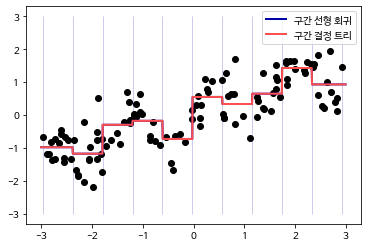

In [21]:
line_binned = kb.transform(line)

plt.plot(X[:,0], y, 'o', c='k')

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')

=> 선형모델은 각 구간에서 상수값을 가지며 더 유연해짐<br>
=> 트리모델은 원래 알아서 구간을 최적으로 구하는 모델이므로 도움이 안됨

* 선형 특성을 추가(10차원-> 20차원)

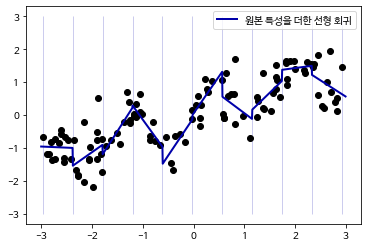

In [22]:
X_combined = np.hstack([X_binned, X*X_binned])
line_combined = np.hstack([line_binned, line*line_binned])

reg = LinearRegression().fit(X_combined, y)

plt.plot(X[:,0], y, 'o', c='k')
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')

=> 각 구간당 선형 회귀를 한 것과 같은 효과

# Polynomial Feautres

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape

(120, 10)

=> 10차항까지 있으므로 10개의 특성이 있음

In [24]:
print(poly.get_feature_names())
print(X_poly[:5])

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


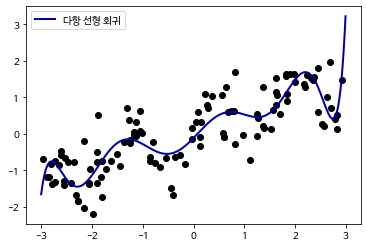

In [25]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(X[:,0],y, 'o', c='k')
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.legend(loc='best')

=> 데이터가 부족한 구간에서는 민감하게 작동함

* 아무런 변환을 거치지 않은 SVM과의 비교

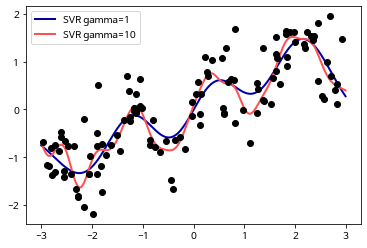

In [26]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')
plt.plot(X[:,0],y, 'o', c='k')
plt.legend(loc='best')

## boston dataset에 적용 예

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [28]:
from sklearn.linear_model import Ridge
ridge1 = Ridge().fit(X_train_scaled, y_train)
print(f'상호작용 특성이 없을 때 점수: {ridge1.score(X_test_scaled, y_test):.3f}')
ridge2 = Ridge().fit(X_train_poly, y_train)
print(f'상호작용 특성이 있을 때 점수: {ridge2.score(X_test_poly, y_test):.3f}')

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print(f'상호작용 특성이 없을 때 점수: {rf1.score(X_test_scaled, y_test):.3f}')
rf2 = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print(f'상호작용 특성이 있을 때 점수: {rf2.score(X_test_poly, y_test):.3f}')

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


=> Ridge의 경우 상호작용이 도움이 되지만 랜덤포레스트는 도움이 안됨

# 일변량 비선형 변환

* 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있으므로 적절한 변환이 필요
* 비선형 관계에서 log나 exp, 주기성 관계에서 sin,cos이 도움이 될 수 있음

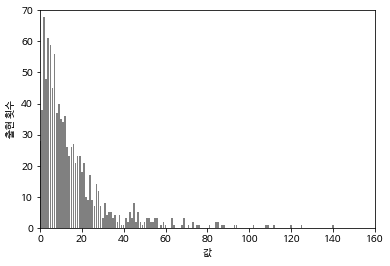

In [30]:
# 비선형 관계의 포아송 분포 예시

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')
plt.show()

* 데이터 변환 없이 Ridge 적용

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f'테스트 점수: {score:.2f}')

테스트 점수: 0.62


* 데이터 변환 후 Ridge 적용

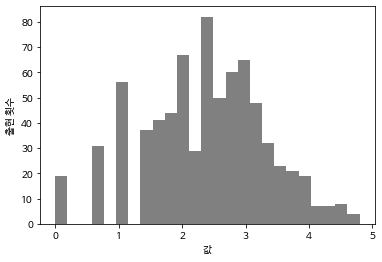

In [32]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')
plt.show()

In [33]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f'테스트 점수: {score:.2f}')

테스트 점수: 0.87


# 결론

* 구간분할, 다항식, 상호작용은 선형모델이나 나이브 베이즈같은 덜 복잡한 모델의 경우 큰 영향을 줌
* SVM, KNN, 신경망 같은 모델은 이득을 볼 수 있지만 선형모델만큼 영향이 뚜렷하지 않음
* 트리 기반 모델은 굳이 할 필요 없을 때가 많음